Find approximately the value of $\sin \dfrac{\pi}{5}$, using Lagrange interpolation polynomial for the function $\sin(x)$ with nodes $x_0=0$, $x_1=\frac{\pi}{6}$, $x_2=\frac{\pi}{3}$, $x_3=\frac{\pi}{2}$.

Construct the graphs of $f(x)$ and of the interpolation polynomial and the nodes in one coordinate system.

Evaluate the error and compare with the absolute error.

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
import sys
sys.path.append('../util')

from lagrange_poly import lagrange_poly

In [3]:
nodes = np.array([0, np.pi/6,  np.pi/3, np.pi/2])

f = lambda x: np.sin(x)

In [5]:
x_target = np.pi/5

exact_value = f(x_target)
approx_value = lagrange_poly(nodes, f, x_target)

print("Exact value: ", exact_value)
print("Approx value: ", approx_value)
print("Absolute error: ", abs(exact_value - approx_value))

Exact value:  0.5877852522924731
Approx value:  0.5870614872174388
Absolute error:  0.0007237650750343549


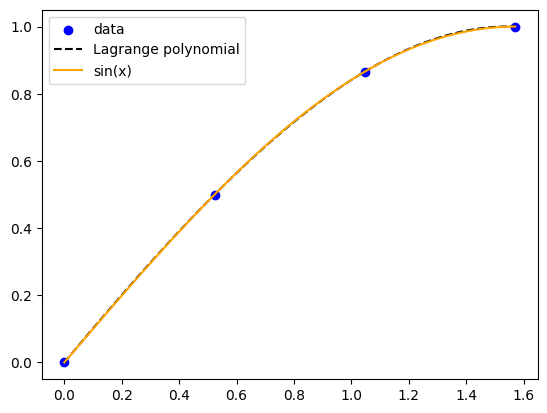

In [14]:
x_axis = np.linspace(nodes.min(), nodes.max(), 300)

plt.scatter(nodes, f(nodes), color='blue')
plt.plot(x_axis, lagrange_poly(nodes, f, x_axis), linestyle='dashed', color='black')
plt.plot(x_axis, f(x_axis), label='sin(x)', color='orange')
plt.legend(['data', 'Lagrange polynomial', 'sin(x)'])
plt.show()

## Error evaluation

$ R_n(x) = |f(x) - L_n(f; x)| $

$ R_n(x) = |\dfrac{f^{(n + 1)}(\zeta)}{(n + 1)!} \displaystyle\prod_{i = 0}^{n}(x - x_i)| $, for some $ \zeta\in(0, \dfrac{\pi}{2})  $ 

We cannot deduce the value of $ \zeta $, so we will take the maximum possible error.

$ R_{n}(x) \leq M_{n}(x) :=  \dfrac{\displaystyle\max_{x \in [0, \frac{\pi}{2}]}|f^{(n + 1)}(x)|}{(n + 1)!} |\displaystyle\prod_{i = 0}^{n}(x - x_i)| $

We have 4 nodes, so the the degree $n$ will be the count of the nodes minus one

In this case $ 4 - 1 = 3 $ and $ f(x) = sin(x) $

$ M_{n}(x) =  \dfrac{\displaystyle\max_{x \in [0, \frac{\pi}{2}]}|\sin^{(3 + 1)}(x)|}{(3 + 1)!} |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

$ M_{n}(x) =  \dfrac{\displaystyle\max_{x \in [0, \frac{\pi}{2}]}|\sin^{(4)}(x)|}{4!} |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

$ M_{n}(x) =  \dfrac{\displaystyle\max_{x \in [0, \frac{\pi}{2}]}|\sin^{(4)}(x)|}{24} |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

Let's find $ \displaystyle\max_{x \in [0, \frac{\pi}{2}]}|\sin^{(4)}(x)| $

$
\sin^{(1)}(x) = \cos(x)
$

$
\sin^{(2)}(x) = -\sin(x)
$

$
\sin^{(3)}(x) = -\cos(x)
$

$
\sin^{(4)}(x) = \sin(x)
$

Now we are left with 
$ \displaystyle\max_{x \in [0, \frac{\pi}{2}]}|\sin(x)| $

We know that
$ \sin(x) \in [-1, 1] $
and we know that
$ \sin(\frac{\pi}{2}) = 1 $

Thus $ \displaystyle\max_{x \in [0, \frac{\pi}{2}]}|\sin(x)| = 1 $

$ M_{n}(x) =  \dfrac{\displaystyle\max_{x \in [0, \frac{\pi}{2}]}|\sin^{(4)}(x)|}{24} |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

$ M_{n}(x) =  \dfrac{1}{24} |\displaystyle\prod_{i = 0}^{3}(x - x_i)| $

In [22]:
max_error_evaluation = lambda x: (1 / 24) * abs(
    math.prod((x - nodes[i]) for i in range(nodes.size))
)

absolute_error = lambda x: abs(f(x) - lagrange_poly(nodes, f, x))

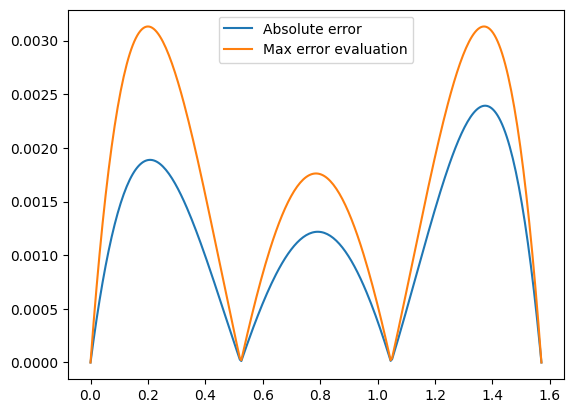

In [24]:
plt.plot(x_axis, absolute_error(x_axis))
plt.plot(x_axis, max_error_evaluation(x_axis))
plt.legend(['Absolute error', 'Max error evaluation'])
plt.show()